# Unpaired, or independent sample tests
t-test for the means of two independent samples

References:  
- [Always use Welch's t-test instead of Student's t-test](http://daniellakens.blogspot.com/2015/01/always-use-welchs-t-test-instead-of.html) (Daniel Lakens)
- [Why are p-values uniformly distributed under the null hypothesis?](https://stats.stackexchange.com/a/11288/241833) (stats.stackexchange)
- [How to interpret at p-value histogram](http://varianceexplained.org/statistics/interpreting-pvalue-histogram/) (Variance Explained)
-[Two Independent Samples Unequal Variance (Welch’s Test)](https://sites.nicholas.duke.edu/statsreview/means/welch/) (Duke's Nicholas School of the Environment)

**TODO.**
- [Independent t-test in python](https://scientificallysound.org/2017/05/16/independent-t-test-python/) (Scientifically Sound)

# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

# Distribution of p-values under null hypothesis: equal variance

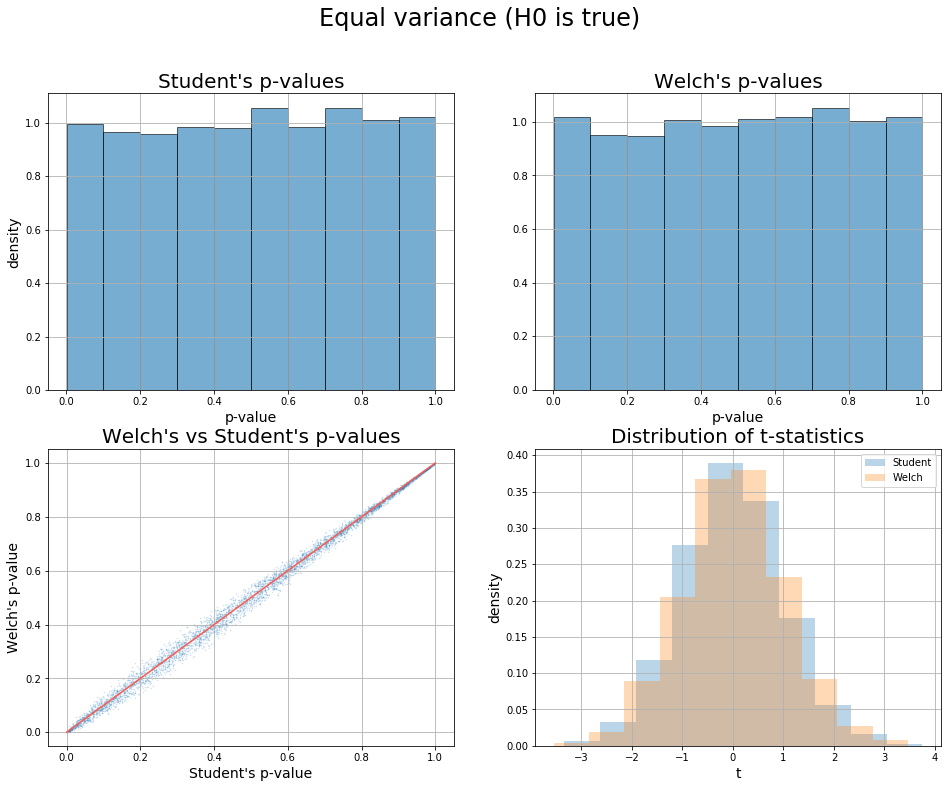

In [2]:
np.random.seed(42)

# Parameters
mu0 = 0
sigma0 = 1.11
n0 = 38

mu1 = mu0 # null hypothesis is true: means are equal
sigma1 = sigma0 #1.84
n1 =22

nb_sims = 5_000

# Generate data
samples0 = stats.norm.rvs(loc=mu0, scale=sigma0, size=(nb_sims, n0))
samples1 = stats.norm.rvs(loc=mu1, scale=sigma1, size=(nb_sims, n1))

# Calculuate p-values with Student's and Welch's tests

Student = [stats.ttest_ind(s[:n0], s[n0:], equal_var=True)[:] for s in np.concatenate([samples0, samples1], axis=1)]
Student = np.array(list(zip(*Student)))

Welch = [stats.ttest_ind(s[:n0], s[n0:], equal_var=False)[:] for s in np.concatenate([samples0, samples1], axis=1)]
Welch = np.array(list(zip(*Welch)))

# Visualization: distribution of p-values using Student's t-test and Welch's t- test
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

bins = 10
axs[0][0].hist(Student[1], bins=bins, density=True, edgecolor='k', alpha=.6);
axs[0][0].set_title("Student's p-values", fontsize=20)
axs[0][0].set_ylabel("density", fontsize=14)
axs[0][0].set_xlabel("p-value", fontsize=14)
axs[0][0].grid();

axs[0][1].hist(Welch[1], bins=bins, density=True, edgecolor='k', alpha=.6)
axs[0][1].set_title("Welch's p-values", fontsize=20)
axs[0][1].set_xlabel("p-value", fontsize=14)
axs[0][1].grid();

axs[1][0].scatter(x=Student[1], y=Welch[1], marker='.', s=1, facecolors=None, alpha=.2)
axs[1][0].plot([0, 1], [0, 1], color='xkcd:coral')
axs[1][0].set_xlabel("Student's p-value", fontsize=14)
axs[1][0].set_ylabel("Welch's p-value", fontsize=14)

axs[1][0].set_title("Welch's vs Student's p-values", fontsize=20)

axs[1][0].grid();

axs[1][1].hist(Student[0], bins=bins, density=True, alpha=.3, label='Student');
axs[1][1].hist(Welch[0], bins=bins, density=True, alpha=.3, label='Welch')
axs[1][1].set_title("Distribution of t-statistics", fontsize=20)
axs[1][1].set_ylabel("density", fontsize=14)
axs[1][1].set_xlabel("t", fontsize=14)
axs[1][1].legend()
axs[1][1].grid(True)


fig.suptitle("Equal variance (H0 is true)", fontsize=24);

# Distribution of p-values under null hypothesis: unequal variance

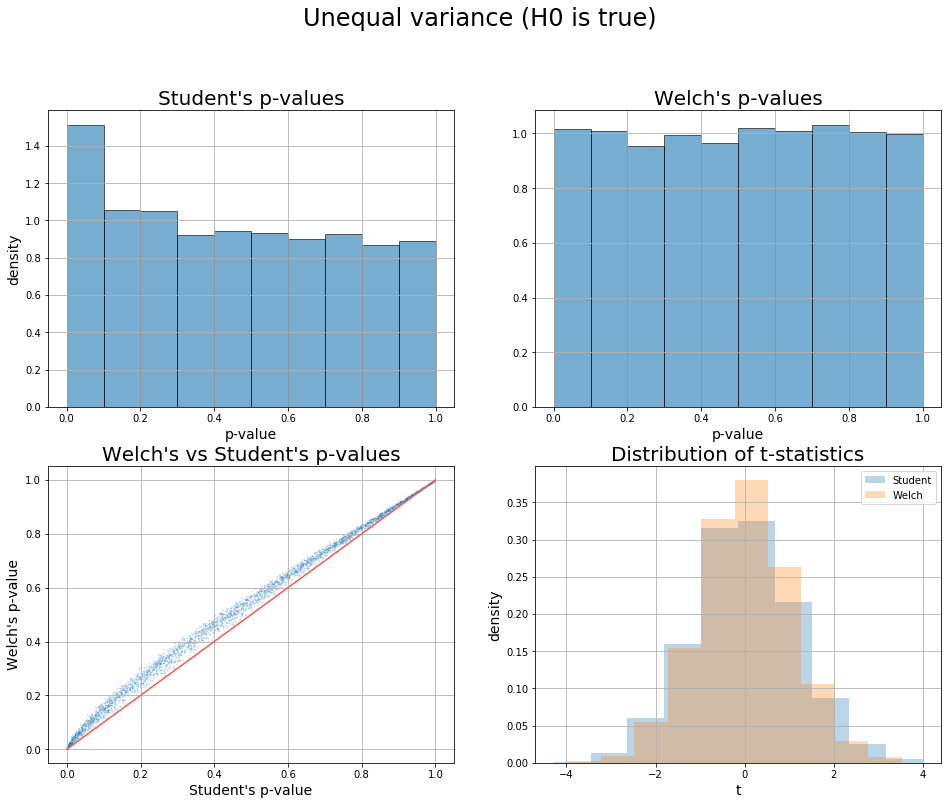

In [3]:
np.random.seed(42)

# Parameters
mu0 = 0
sigma0 = 1.11
n0 = 38

mu1 = mu0 # null hypothesis is true: means are equal
sigma1 = 1.84 # UNEQUAL VARIANCES
n1 =22

nb_sims = 5_000

# Generate data
samples0 = stats.norm.rvs(loc=mu0, scale=sigma0, size=(nb_sims, n0))
samples1 = stats.norm.rvs(loc=mu1, scale=sigma1, size=(nb_sims, n1))

# Calculuate p-values with Student's and Welch's tests

Student = [stats.ttest_ind(s[:n0], s[n0:], equal_var=True)[:] for s in np.concatenate([samples0, samples1], axis=1)]
Student = np.array(list(zip(*Student)))

Welch = [stats.ttest_ind(s[:n0], s[n0:], equal_var=False)[:] for s in np.concatenate([samples0, samples1], axis=1)]
Welch = np.array(list(zip(*Welch)))

# Visualization: distribution of p-values using Student's t-test and Welch's t- test
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

bins = 10
axs[0][0].hist(Student[1], bins=bins, density=True, edgecolor='k', alpha=.6);
axs[0][0].set_title("Student's p-values", fontsize=20)
axs[0][0].set_ylabel("density", fontsize=14)
axs[0][0].set_xlabel("p-value", fontsize=14)
axs[0][0].grid();

axs[0][1].hist(Welch[1], bins=bins, density=True, edgecolor='k', alpha=.6)
axs[0][1].set_title("Welch's p-values", fontsize=20)
axs[0][1].set_xlabel("p-value", fontsize=14)
axs[0][1].grid();

axs[1][0].scatter(x=Student[1], y=Welch[1], marker='.', s=1, facecolors=None, alpha=.2)
axs[1][0].plot([0, 1], [0, 1], color='xkcd:coral')
axs[1][0].set_xlabel("Student's p-value", fontsize=14)
axs[1][0].set_ylabel("Welch's p-value", fontsize=14)

axs[1][0].set_title("Welch's vs Student's p-values", fontsize=20)

axs[1][0].grid();

axs[1][1].hist(Student[0], bins=bins, density=True, alpha=.3, label='Student');
axs[1][1].hist(Welch[0], bins=bins, density=True, alpha=.3, label='Welch')
axs[1][1].set_title("Distribution of t-statistics", fontsize=20)
axs[1][1].set_ylabel("density", fontsize=14)
axs[1][1].set_xlabel("t", fontsize=14)
axs[1][1].legend()
axs[1][1].grid(True)


fig.suptitle("Unequal variance (H0 is true)", fontsize=24, y=1.);